## PCA and t-SNE Visualization Lab
This lab demonstrates how to use PCA and t-SNE for dimensionality reduction and visualization.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

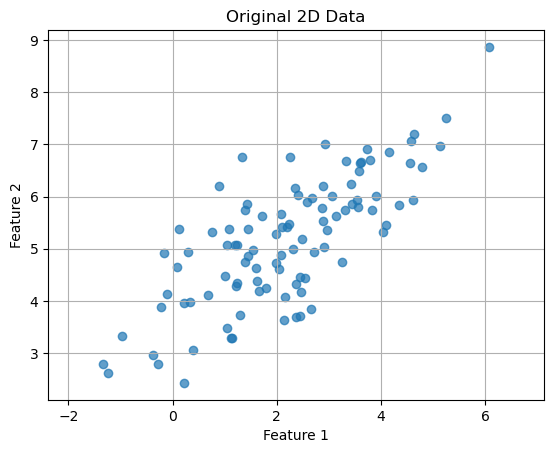

In [6]:

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [8]:

X_centered = X - np.mean(X, axis=0)

In [10]:
cov_matrix = np.cov(X_centered.T)

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [14]:

X_pca_1d = X_centered.dot(eig_vecs[:, 0])

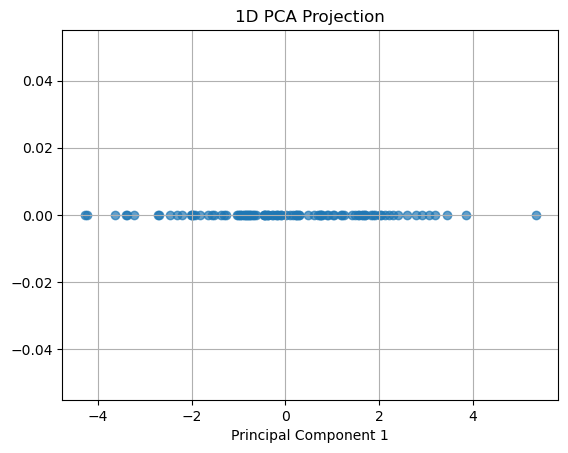

In [16]:

plt.scatter(X_pca_1d, np.zeros_like(X_pca_1d), alpha=0.7)
plt.title("1D PCA Projection")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

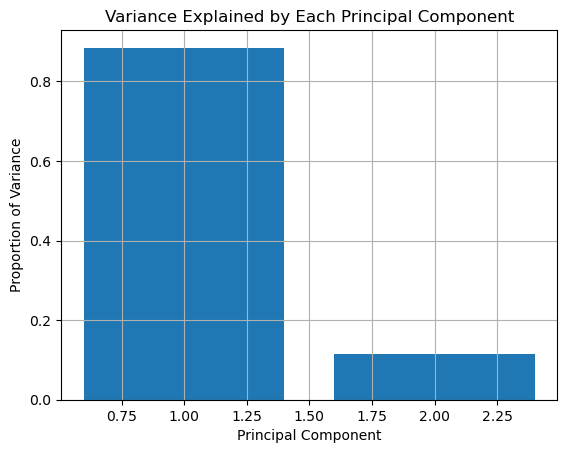

In [18]:

explained_variance = eig_vals / np.sum(eig_vals)

plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.grid(True)
plt.show()

## Part 2: t-SNE on Digits Dataset

In [20]:

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data
y = digits.target

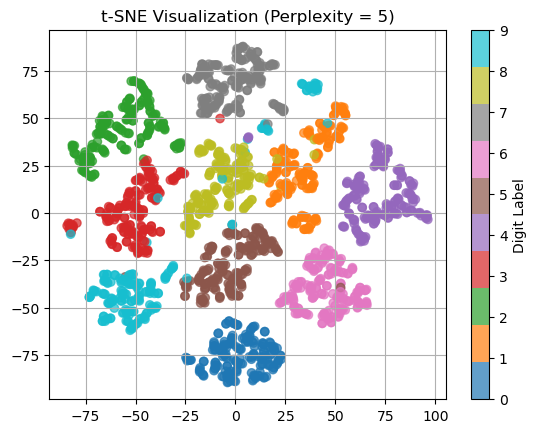

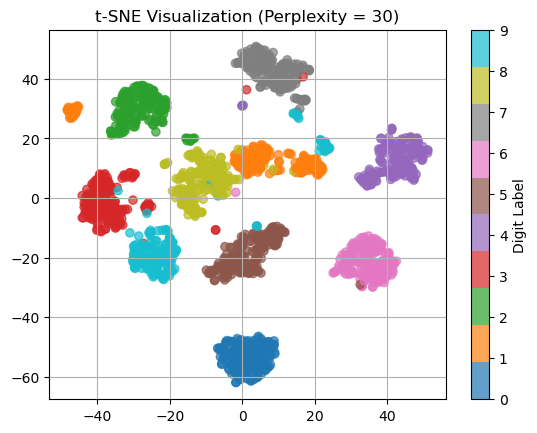

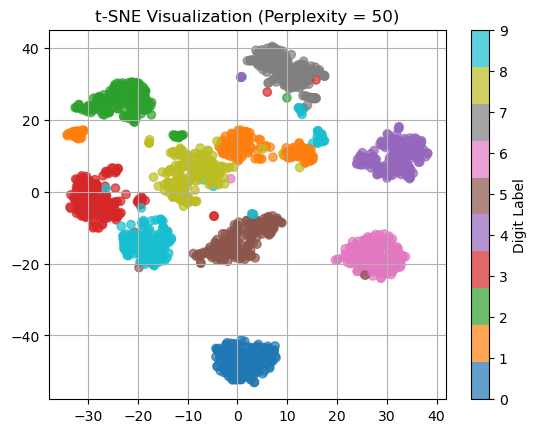

In [22]:

for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)
    
    plt.figure()
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.title(f"t-SNE Visualization (Perplexity = {perplexity})")
    plt.colorbar(scatter, label="Digit Label")
    plt.grid(True)
    plt.show()

## Conclusion
PCA helped us reduce 2D data to 1D while retaining most of the variance.
t-SNE revealed meaningful clusters in the handwritten digits dataset depending on the perplexity value.